In [118]:
from haven import haven_jupyter as hj
from haven import haven_results as hr
from haven import haven_utils as hu
import pprint
import numpy as np
from experiments_config.syn_interp_exp import *
from experiments_config.kernelize_exp import *
from experiments_config.syn_vary_n_exp import *
from experiments_config.syn_cyclic_exp import *
from experiments_config.syn_check_alpha_beta import *
from experiments_config.syn_non_interp_exp import *
from exp_configs import get_exp_group
from copy import deepcopy

In [ ]:
def form_exp_list(exp_groups, exp_config):
    exp_list = []
    for e in exp_groups:
        exp_list += get_exp_group(**exp_config)[e]
    return exp_list

In [688]:
# path to where the experiments are saved
base = './outputs/'

savedir_synthetic_non_interp = base + 'output_synthetic_non_interp'
savedir_synthetic_main_plot = base + 'output_synthetic_main_plot'

exp_config_fname = './exp_configs.py'

In [683]:
markersize = 15
markevery = 20
linewidth = 3
shb = 'solid'
sgd = 'dotted'
styles = {}

styles['SGD_CNST'] = {'label':'SGD',  'color':'black',
                         'marker':'d', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SHB_CNST'] = {'label':'SHB',  'color':'blue',
                         'marker':'o', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SHB_MUL_0.4_False'] = {'label':'Multi-SHB',  'color':'green',
                         'marker':'*', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SHB_MUL_auto_False'] = {'label':'Multi-SHB-adaptive-increase',  'color':'darkcyan',
                         'marker':'v', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SHB_MUL_0.4_True'] = {'label':'Multi-SHB-CNST',  'color':'orange',
                         'marker':'h', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SHB_MUL_auto_True'] = {'label':'Multi-SHB-adaptive-constant',  'color':'brown',
                         'marker':'p', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SGD_ACC_EXP'] = {'label':'Nesterov-EXP',  'color':'purple',
                         'marker':'s', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SHB_MIX_0.5'] = {'label':'2P-SHB',  'color':'red',
                         'marker':'P', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

# -------------------------------------------------------------------------------------------

styles['SHB_CNST_1.0'] = {'label':'SHB-1.0',  'color':'darkcyan',
                         'marker':'d', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_1'] = {'label':'SHB-1.0',  'color':'darkcyan',
                         'marker':'d', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.9'] = {'label':'SHB-0.9',  'color':'m',
                         'marker':'v', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.8'] = {'label':'SHB-0.8',  'color':'red',
                         'marker':'s', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.7'] = {'label':'SHB-0.7',  'color':'brown',
                         'marker':'p', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.6'] = {'label':'SHB-0.6',  'color':'orange',
                         'marker':'8', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.5'] = {'label':'SHB-0.5',  'color':'mediumpurple',
                         'marker':'H', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.4'] = {'label':'SHB-0.4',  'color':'skyblue',
                         'marker':'X', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.3'] = {'label':'SHB-0.3',  'color':'green',
                         'marker':'x', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.25'] = {'label':'SHB-0.25',  'color':'cyan',
                         'marker':'>', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.12'] = {'label':'SHB-0.125',  'color':'pink',
                         'marker':'h', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

In [704]:
styles['SHB_MUL_0.5'] = {'label':'SHB-MUL-0.5',  'color':'pink',
                         'marker':'h', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MUL_auto'] = {'label':'SHB-MUL',  'color':'slategray',
                         'marker':'^', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MUL_PAN_2'] = {'label':'Multi-SHB-PAN-2',  'color':'mediumpurple',
                         'marker':'8', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MUL_PAN_max'] = {'label':'Multi-SHB-PAN-T-KAP',  'color':'navy',
                         'marker':'3', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

# ExpList for Losses

In [808]:
def get_res_dict(config, datasets, batch_size, kappa, variance, runs=[0,1,2]):
    exp_groups = []

    for dataset in datasets:
        exp_groups.append("exp_" + dataset)
    exp_list = form_exp_list(exp_groups, config)

    loss_exp_dict={}
    combined_filter_dict={}

    for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:

        rfilteres=[({"loss_func":loss_func})] 
        rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
        loss_exp_dict[loss_func]=rest_exp 


    for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
        filtered_best_exp_list=[]

        filtered_best_exp_list +=[        
                ({'opt':{'name':'EXP_SHB', 'alpha_t':'CNST', 'method':'WANG21', "is_sls":False},  
                    "loss_func":loss_func, 'kappa':kappa, 'variance': variance, 'batch_size':batch_size},
                   {'style':styles["SHB_CNST"]})]


        filtered_best_exp_list +=[        
            ({'opt':{'name':'EXP_SGD', 'alpha_t':'CNST'},  
                "loss_func":loss_func, 'kappa':kappa, 'variance': variance, 'batch_size':batch_size},
               {'style':styles["SGD_CNST"]})]

        filtered_best_exp_list +=[        
            ({'opt':{'name':'EXP_ACC_SGD', 'alpha_t':'DECR', "is_sls":False},  
                "loss_func":loss_func, 'kappa':kappa, 'variance': variance, 'batch_size':batch_size},
               {'style':styles["SGD_ACC_EXP"]})]
        for run in runs:
            for c in [0.5]:
                filtered_best_exp_list +=[        
                ({'opt':{'name':'Mix_SHB', 'c':c},  
                    "loss_func":loss_func, 'batch_size':batch_size, 'kappa':kappa, 'variance': variance, 'runs':run},
                   {'style':styles["SHB_MIX_0.5"]})]

#             for C in [2, 'max']:
#                 filtered_best_exp_list +=[        
#                     ({'opt':{'name':'M_SHB_PAN', 'C':C},  
#                         "loss_func":loss_func, 'batch_size':batch_size, 'kappa':kappa, 'variance': variance, 'runs':run},
#                        {'style':styles[f"SHB_MUL_PAN_{C}"]})]
    #         for C in ['max']:
    #             filtered_best_exp_list +=[        
    #                 ({'opt':{'name':'M_SHB_PAN', 'C':C},  
    #                     "loss_func":loss_func, 'kappa':kappa, 'variance': variance},
    #                    {'style':styles[f"SHB_MUL_PAN_{C}"]})]
            for c in [0.4]:
                for beta in [False, True]:
                    filtered_best_exp_list +=[        
                        ({'opt':{'name':'M_ASHB', 'c':c, 'beta_const':beta},  
                            "loss_func":loss_func, 'batch_size':batch_size, 'kappa':kappa, 'variance': variance, 'runs':run},
                           {'style':styles[f"SHB_MUL_{c}_{beta}"]})]

        combined_filter_dict[loss_func]=filtered_best_exp_list 

    print(len(hr.filter_exp_list(loss_exp_dict["squared_loss"], filterby_list=combined_filter_dict["squared_loss"], verbose=0)))
    return loss_exp_dict, combined_filter_dict

# Squared Loss

12
[{'dataset': 'synthetic_kappa', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG21', 'is_sls': False, 'mis_spec': 1.0, 'ada': None, 'ld': None, 'ld_sche': None, 'c': 1}, 'regularization_factor': 0.0, 'n_samples': 10000, 'd': 20, 'batch_size': -1.1111111111111112, 'max_epoch': 7000, 'runs': 0, 'kappa': 512, 'variance': 0.01}, {'dataset': 'synthetic_kappa', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG21', 'is_sls': False, 'mis_spec': 1.0, 'ada': None, 'ld': None, 'ld_sche': None, 'c': 1}, 'regularization_factor': 0.0, 'n_samples': 10000, 'd': 20, 'batch_size': -1.1111111111111112, 'max_epoch': 7000, 'runs': 1, 'kappa': 512, 'variance': 0.01}, {'dataset': 'synthetic_kappa', 'loss_func': 'squared_loss', 'opt': {'name': 'Mix_SHB', 'c': 0.5}, 'regularization_factor': 0.0, 'n_samples': 10000, 'd': 20, 'batch_size': -1.1111111111111112, 'max_epoch': 7000, 'runs': 0, 'kappa': 512, 'variance': 0.01}, {'dat

[<Figure size 1200x800 with 1 Axes>]

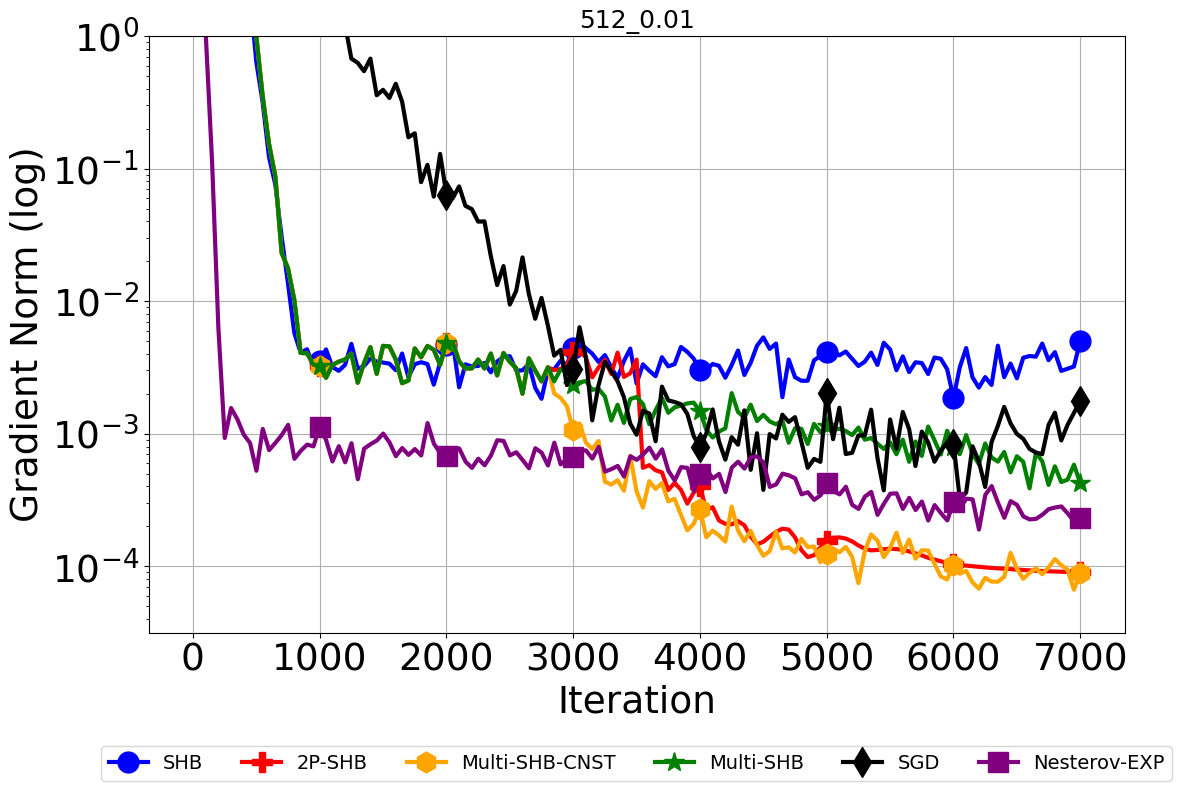

In [815]:
datasets = ["synthetic_kappa"]
batch_size = -10/9
kappa = 512
variance = 1e-2
runs = [0,1]
config = EXP_SYN_NON_INTERP_CONFIGS
loss_exp_dict, combined_filter_dict = get_res_dict(config, datasets, batch_size, kappa, variance, runs)
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["squared_loss"],
                    savedir_base=savedir_synthetic_main_plot,
                    filterby_list=combined_filter_dict["squared_loss"],
                    verbose= 0       
                     )
rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['kappa','variance'], 
    groupby_list = ['dataset', 'model', 'n_samples', 'variance', 'kappa'],
    log_metric_list = ["grad_norm", 'alpha_k', 'train_loss'],
    legend_fontsize=14,
    x_fontsize=27,
    y_fontsize=27,
    xtick_fontsize=27,
    ytick_fontsize=27,
    title_fontsize=18,
    result_step=50,
    ylim_list=[[(10**(-4.5), 10**(0))]], 
    #[(10**(-13), 10**(5))],[(10**(-13), 10**(5))]],# (10**(-3), 24), (10**(-3.1), 10**(-.8))]],(10**(0), 1e6)(-0.1, 1.1)(10**(-15), 10**(-4))
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'alpha_k': 'alpha_k'},
                     {'beta_k': 'beta_k'},
                     {'lambda_k': 'lambda_k'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': 'Iteration'}],
                figsize=(12,8),
    plot_confidence=False,
     legend_kwargs={'bbox_to_anchor':[0.5, -0.22], 
                           'borderaxespad':0., 
                           'ncol':6,'loc':'center'},
    savedir_plots=f'./plots/squared_synthetic_label_{batch_size}_{kappa}_{variance}' 
            )